In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve,roc_curve, auc
import os
os.chdir("..")
from models.decode_utils import *
from utils import *
import pandas as pd

In [8]:
detail_path = "/public1/YHC/mod_result/ara_mod_result.txt"
bisulfite_path = "/mnt/sdg2/ara/Ara.CpG.gz.bismark.zero.cov"

In [9]:
# load bisulfite as dataframe
df = pd.read_csv(bisulfite_path, sep="\t", header=None)

In [10]:
# filter meth ratio 100 pos and 0 as neg
pos_df = df[(df[3] >= 100.0) & ((df[4] + df[5]) >= 10)]
neg_df = df[(df[3] <= 0.0) & ((df[4] + df[5]) >= 10)]

In [11]:
detail_df = pd.read_csv(detail_path, sep="\t", header=None)

In [12]:
detail_df.loc[:, 4] = detail_df[4].astype(str)
detail_df['key'] = detail_df[3] + "\t" + detail_df[4]

/tmp/ipykernel_1167796/1461988762.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['895081' '895003' '894967' ... '7712251' '7712263' '7712375']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  detail_df.loc[:, 4] = detail_df[4].astype(str)


In [13]:
pos_df.loc[:,1] = pos_df[1].astype(str)
pos_df['key'] = pos_df[0] + "\t" + pos_df[1]
neg_df.loc[:,1] = neg_df[1].astype(str)
neg_df['key'] = neg_df[0] + "\t" + neg_df[1]

/tmp/ipykernel_1167796/1927433482.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['108' '790' '809' ... '26962330' '26975229' '26975252']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pos_df.loc[:,1] = pos_df[1].astype(str)
/tmp/ipykernel_1167796/1927433482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_df['key'] = pos_df[0] + "\t" + pos_df[1]
/tmp/ipykernel_1167796/1927433482.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['5' '6' '9' ... '356159' '361202' '364545']' has dtype incompatible with int64, please explicitly cast to a compatible dt

In [14]:
# filter detail dafaframe with bisulfite 100 and 0 methy ratio
pos_detail_df = detail_df[detail_df['key'].isin(pos_df['key'])]
neg_datail_df = detail_df[detail_df['key'].isin(neg_df['key'])]

In [15]:
# get pos ground truth and negative ground truth, and balacing both
pos = pos_detail_df[6].values
neg = neg_datail_df[6].values[np.random.permutation(np.arange(len(neg_datail_df)))][:len(pos_detail_df)]

In [16]:
# making up labels
probs = np.concatenate([pos, neg])
labels = np.zeros(len(pos) + len(neg), dtype=np.int32)
labels[:len(pos)] = 1
preds = (probs> 0.5).astype(int)

In [17]:
TP, FP, TN, FN = compute(preds, labels)
(TP,FP,TN,FN, estimate_scores(TP, FP, TN, FN))

  0%|          | 0/3549696 [00:00<?, ?it/s]

100%|██████████| 3549696/3549696 [00:09<00:00, 366429.76it/s]


(1645982,
 55235,
 1719613,
 128866,
 (0.9481361220791865,
  0.967532066749862,
  0.9273932190249531,
  0.9688790251334198,
  0.9470375266285296,
  0.031120974866580123,
  0.07260678097504687,
  0.897044515733276))

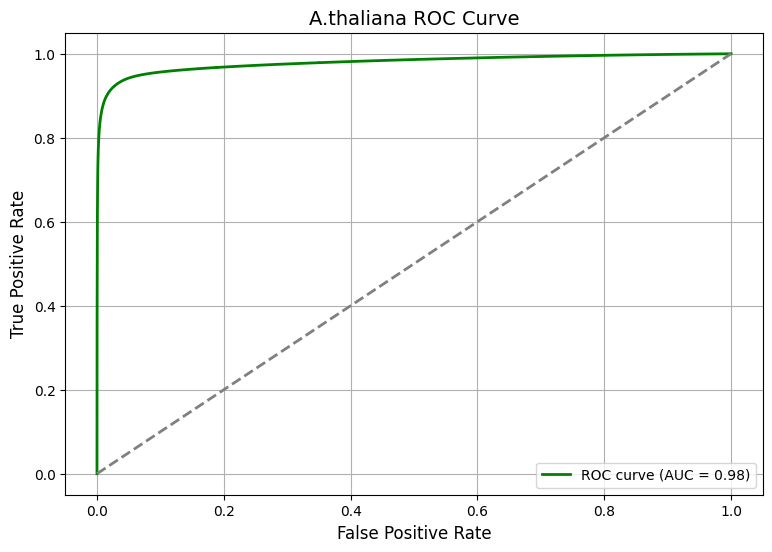

In [18]:
fpr, tpr, thresholds = roc_curve(labels, probs)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize=(9, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('A.thaliana ROC Curve', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

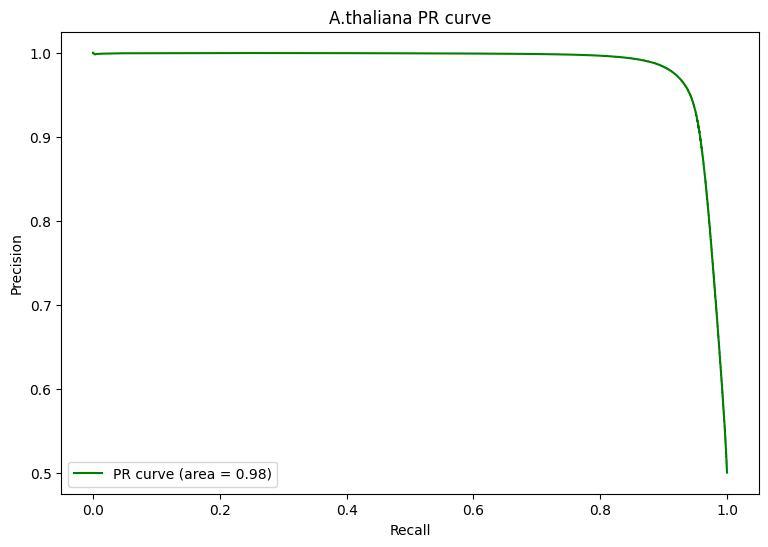

In [19]:
# 计算precision, recall和thresholds
precision, recall, thresholds = precision_recall_curve(labels, probs)

# 计算PR曲线下的AUC值
pr_auc = auc(recall, precision)

# 绘制PR曲线
plt.figure(figsize=(9, 6))
plt.plot(recall, precision, color='green', label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('A.thaliana PR curve')
plt.legend(loc="lower left")
plt.show()

In [20]:
print(roc_auc, pr_auc)

0.9792789147461651 0.9845427094038801
